In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('prepared_data.csv').drop('Unnamed: 0',axis=1)
df.head()

,class,cap-shape_b,cap-shape_c,cap-shape_k,cap-shape_s,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


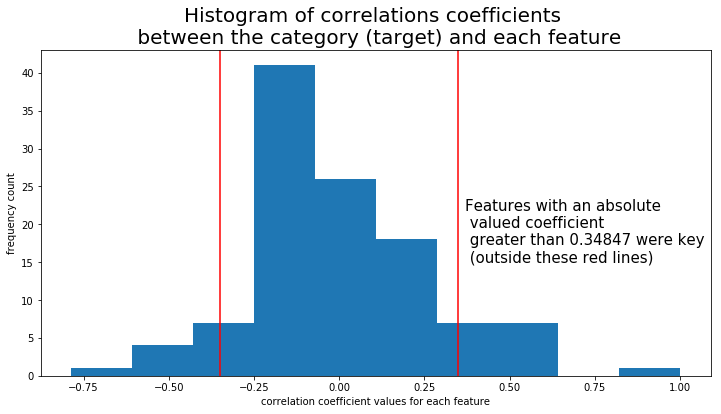

In [4]:
import matplotlib.pyplot as plt
import numpy as np
corr = df.corr()
plt.figure(figsize=(12,6))
x=0.348387
bins=int(np.sqrt(len(corr['class'].unique())))
plt.hist(corr['class'],bins=bins)
plt.title('Histogram of correlations coefficients \n between the category (target) and each feature',fontsize=20)
plt.axvline(x=x,color='red')
plt.axvline(x=-x,color='red')
text = "Features with an absolute\n valued coefficient \n greater than 0.34847 were key \n (outside these red lines)"
plt.text(0.37,15,text,fontsize=15)
plt.xlabel("correlation coefficient values for each feature")
plt.ylabel("frequency count")
#plt.savefig('hist.png')
plt.show()

In [ ]:
import numpy as np

In [5]:
tables = []
thresholds = [0,0.15,0.20,0.25,0.3,0.35,0.4,0.45,0.50,0.51,.54,0.5401,0.54002,0.540025,0.55,0.6,0.65,0.7]
print(len(thresholds))

18


Results for: Logistic Regression

[[1274    0]
 [   3 1161]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

0.9987694831829368





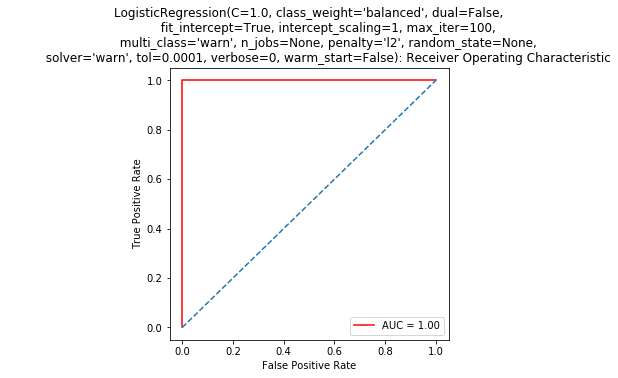

Results for: Decision Tree

[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

1.0





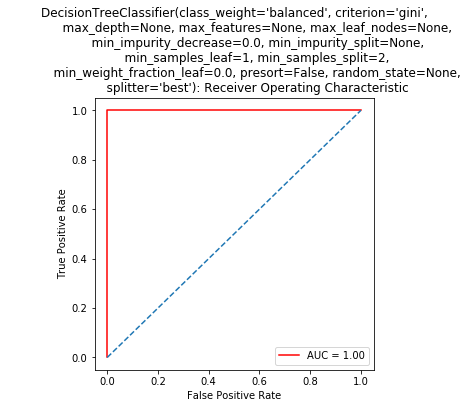

Results for: Random Forest

[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

1.0





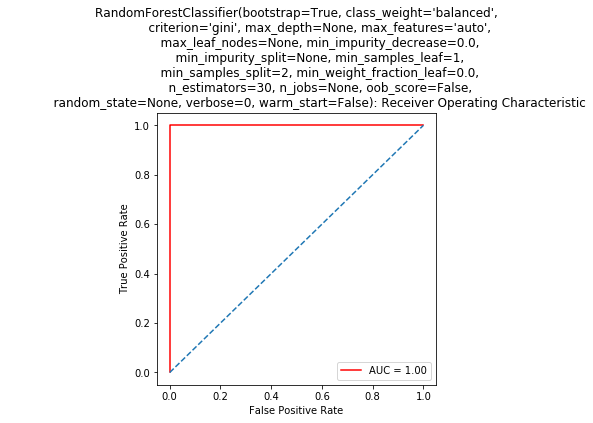

Results for: K-Nearest Neighbors

[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

1.0





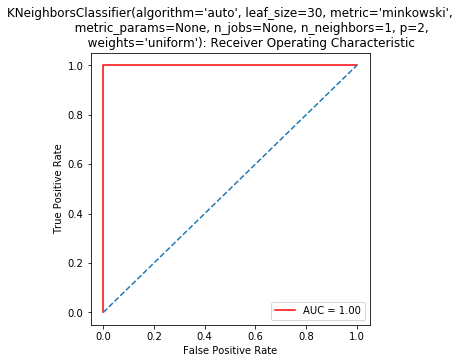

Results for: Linear SVM

[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

1.0





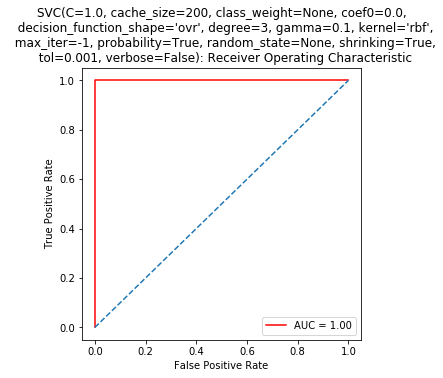

,F1 score,accuracy score,model,time,threshold,features
0,0.99871,0.998769,Logistic Regression,0.041264,0,111
1,1.00000,1.000000,Decision Tree,0.025330,0,111
2,1.00000,1.000000,Random Forest,0.084572,0,111
3,1.00000,1.000000,K-Nearest Neighbors,1.753911,0,111
4,1.00000,1.000000,Linear SVM,9.018850,0,111


In [6]:
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,roc_curve,auc

thresholds = [0,0.15,0.20,0.25,0.3,0.35,0.4,0.45,0.50,0.51,.54,0.5401,0.54002,0.540025,0.55,0.6,0.65,0.7]

threshold = thresholds[0]
features = list(corr[np.abs(corr['class'])>threshold]['class'].index)
X = df[features].drop('class',axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

keys = []
scores = []
times = []
f1_scores = []
models = {'Logistic Regression': LogisticRegression(class_weight='balanced'), 'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
          'Random Forest': RandomForestClassifier(n_estimators=30,class_weight='balanced'), 
          'K-Nearest Neighbors':KNeighborsClassifier(n_neighbors=1),
            'Linear SVM':SVC(kernel='rbf', gamma=.10, C=1.0,probability=True)}

for k,v in models.items():
    model = v
    t0=time.time()
    model.fit(X_train, y_train)
    train_time = time.time()-t0
    t1 = time.time()
    pred = model.predict(X_test)
    predict_time = time.time()-t1
    Time_total = train_time+predict_time
    times.append(Time_total)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print(acc)
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    f1_scores.append(f1_score(y_test,pred))
    y_prob = model.fit(X_train,y_train).predict_proba(X_test)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(5,5))
    plt.title(str(model)+': Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

table = pd.DataFrame({'model':keys, 'accuracy score':scores,'F1 score':f1_scores,'time':times})
table['threshold'] = pd.Series([threshold for i in range(len(scores))])
table['features'] = pd.Series([len(features)-1 for i in range(len(scores))])
tables.append(table)
table

In [ ]:
results = pd.concat([i for i in tables],axis=0)
results.to_csv('results.csv')
results

In [ ]:
len(corr[np.abs(corr['class'])>0.540025]['class'].index)-1

In [ ]:
for t in [.50,0.51,.54,0.5401,0.54002,0.540025,.55]:
    print(len(corr[np.abs(corr['class'])>t]['class'].index)-1)

In [9]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,roc_curve,auc

def model_performance(X,y):
    models = {DecisionTreeClassifier(class_weight='balanced','criterion': 'gini', 'max_features': None, 'splitter': 'best')}
    times =[]
    keys = []
    scores = []
    f1_scores = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    for k,v in models.items():
        model = v
        t0=time.time()
        model.fit(X_train, y_train)
        train_time = time.time()-t0
        t1 = time.time()
        pred = model.predict(X_test)
        predict_time = time.time()-t1
        Time_total = train_time+predict_time
        times.append(Time_total)
        print('Results for: ' + str(k) + '\n')
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))
        acc = accuracy_score(y_test, pred)
        #print(acc)
        #print('\n' + '\n')
        keys.append(k)
        scores.append(acc)
        f1_scores.append(f1_score(y_test,pred))
        y_prob = model.fit(X_train,y_train).predict_proba(X_test)[:,1]
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        #plt.figure(figsize=(5,5))
        #plt.title(str(model)+': Receiver Operating Characteristic')
        #plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
        #plt.legend(loc = 'lower right')
        #plt.plot([0, 1], [0, 1],linestyle='--')
        #plt.axis('tight')
        #plt.ylabel('True Positive Rate')
        #plt.xlabel('False Positive Rate')
        #plt.show()
    table = pd.DataFrame({'model':keys, 'accuracy score':scores,'F1 score':f1_scores,'time':times})
    table['features'] = pd.Series([len(features) for i in range(len(scores))])
    return table

In [18]:
tables1 = []
for index in corr.index:
    features = list(corr.loc[:index]['Feature'])
    X = df[features]
    y = df['class']
    tables1.append(model_performance(X,y))
tables11 = pd.concat([i for i in tables1],axis=0)
tables11

,F1 score,accuracy score,model,time,features
0,0.899522,0.896637,Logistic Regression,0.005567,1
1,0.899522,0.896637,Decision Tree,0.002767,1
2,0.899522,0.896637,Random Forest,0.046762,1
3,0.899522,0.896637,K-Nearest Neighbors,0.057864,1
4,0.899522,0.896637,SVM,0.634260,1
0,0.899522,0.896637,Logistic Regression,0.005968,2
1,0.899522,0.896637,Decision Tree,0.002331,2
2,0.899522,0.896637,Random Forest,0.079573,2
3,0.899522,0.896637,K-Nearest Neighbors,0.050519,2
4,0.899522,0.896637,SVM,0.830869,2


In [19]:
tables11.to_csv('results.csv')

In [ ]:
tables11